# MESSAGE SPAM DETECTION 

The purpose of this paper is to explore the results of applying machine learning techniques to Message spam detection. SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS). The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). This dataset is tab-separated values (TSV) file. More detail about dataset can be found on [this page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/).
* This dataset has been collected from free or free for research sources at the Internet. 
* The collection is composed by just one text file, where each line has the correct class followed by the raw message.

## Introduction

Mobile phone spam also known as (unsolicited messages, especially advertising), directed at the text messaging or other communications services of mobile phones or smartphones. Fighting SMS spam is complicated by several factors (compared to Internet email), including the lower rate of SMS spam, which has allowed many users and service providers to ignore the issue, and the limited availability of mobile phone spam-filtering software. 

In the paper we would try to analysis different methods to identify spam/ham messages. We will use different approach to establish relation between the text and the category, based on size of message, word count, special keywords, using term-frequency inverse document-frequency (tf-idf) transform.

## Data Exploration

First we need to import data form **data.txt** which is **tab-separated values (TSV)** file into pandas dataframe for better overview and manipulation. We can use [pd.read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function with separater as tab to load the data in dataframe and can use [dataframe.head()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) for better visualization.

In [1]:
# Import libraries necessary for this project
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import nltk, sys

%matplotlib inline

# Load the SMS Spam Collection Dataset using tab as separater
df = pd.read_csv('data.txt',sep='\t',names=['Class','Text'])
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Count the number of words in each Text
df['Count']=0
for i in np.arange(0,len(df.Text)):
    df.loc[i,'Count'] = len(df.loc[i,'Text'])

# Unique values in target set
print "Unique values in the Class set: ", df.Class.unique()

Unique values in the Class set:  ['ham' 'spam']


In [3]:
# Replace ham with 0 and spam with 1
df = df.replace(['ham','spam'],[0, 1]) 

# displaying the new table
df.head()

,Class,Text,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

In [4]:
# collecting ham messages in one place 
ham  = df[df.Class == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print "Number of ham messages in data set:", ham['Class'].count()
print "Ham Count value", ham_count['Count'].count()

Number of ham messages in data set: 4825
Ham Count value 273


In [5]:
# collecting spam messages in one place 
spam = df[df.Class == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print "Number of spam messages in data set:", spam['Class'].count()
print "Spam Count value:", spam_count['Count'].count()

Number of spam messages in data set: 747
Spam Count value: 120


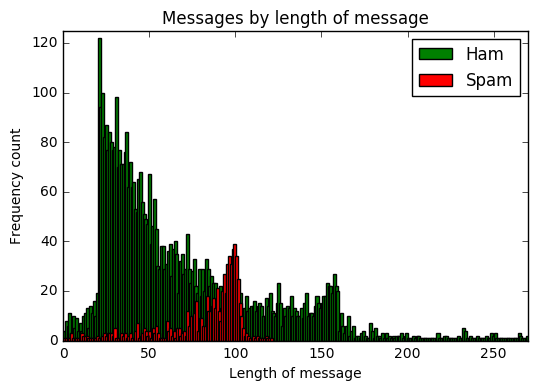

In [6]:
# ploating data for messages
axes  = plt.axes() 
axes.set_xlim(0,270)
axes.set_ylim(0,125)

# naming axes
axes.set_title('Messages by length of message')
plt.xlabel('Length of message')
plt.ylabel('Frequency count')

xlinea = np.linspace(0,273,273,endpoint=True)
xlineb = np.linspace(0,120,120,endpoint=True)
p1 = axes.bar(xlinea, ham_count['Count'], width=1.75, color='g')
p2 = axes.bar(xlineb,spam_count['Count'], width=1.75, color='r')

plt.legend((p1[0], p2[0]), ('Ham', 'Spam'))
plt.show()

## Preparing the Data

In [7]:
# importing Natural Language Toolkit 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#if true it will download all the stopwords
if False:
    nltk.download('stopwords')

#if true will create vectorizer without any stopwords
if False:
    vectorizer = TfidfVectorizer()

#if true will create vectorizer with stopwords
if True:
    stopset = set(stopwords.words("english"))
    vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

In [8]:
# Extract feature column 'Text'
X = vectorizer.fit_transform(df.Text)
# Extract target column 'Class'
y = df.Class

In [9]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4457 samples.
Testing set has 1115 samples.


## Training and Evaluating Models

In [10]:
# Import the models from sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [11]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [12]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [13]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary') 
    print pred_val[a]

0.904411764706
0.890459363958
0.940350877193
0.626728110599
0.896296296296


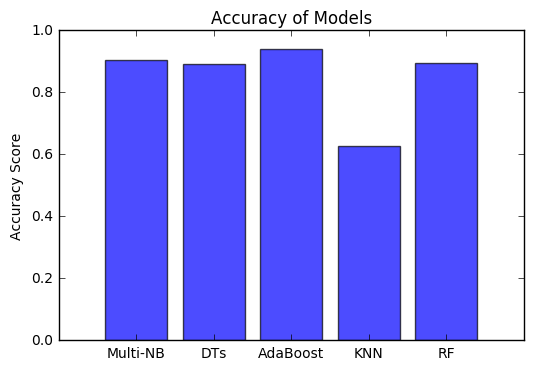

In [14]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

## Result Analysis

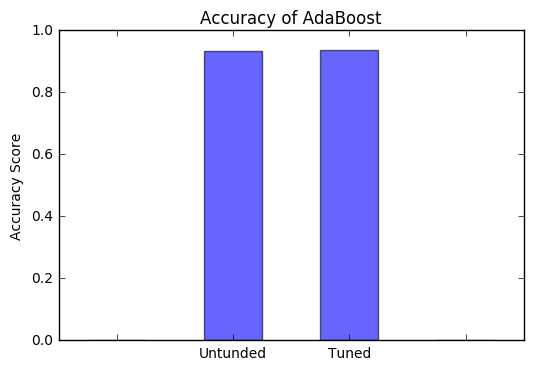

In [15]:
# ploating data for Accuracy Score
# ploating data for Accuracy of Models between 1.00 - 0.90 for better visualization
objects = ('','Untunded', 'Tuned','')
y_pos = np.arange(4)
y_val = [0,0.93470790378,0.937062937063,0 ]
plt.bar(y_pos,y_val, align='center',width = 0.5, alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of AdaBoost')
plt.show()